In [14]:
#Import libraries necessary for a suite of data analyses.
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind
import os
import datetime
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

In [2]:
#Load data from local computer.
weather = pd.read_csv('/home/vanellope/Documents/Thinkful/weather_australia/weatherAUS.csv')
display(weather)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [9]:
#Convert time format from object to datetime.
weather['Date_f'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d')
print(weather.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [17]:
print(weather['Location'].unique())
len(weather['Location'].unique().tolist())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


49

In [22]:
sub_weather = weather.loc[weather['Location'] == 'Sydney',  ['Date_f', 'MinTemp', 'MaxTemp', 'Rainfall']]
display(sub_weather)

,Date_f,MinTemp,MaxTemp,Rainfall
29497,2008-02-01,19.5,22.4,15.6
29498,2008-02-02,19.5,25.6,6.0
29499,2008-02-03,21.6,24.5,6.6
29500,2008-02-04,20.2,22.8,18.8
29501,2008-02-05,19.7,25.7,77.4
29502,2008-02-06,20.2,27.2,1.6
29503,2008-02-07,18.6,26.3,6.2
29504,2008-02-08,17.2,22.3,27.6
29505,2008-02-09,16.4,20.8,12.6
29506,2008-02-10,14.6,24.2,8.8


,Date_f,MinTemp,MaxTemp,Rainfall
29497,2008-02-01,19.5,22.4,15.6
29498,2008-02-02,19.5,25.6,6.0
29499,2008-02-03,21.6,24.5,6.6
29500,2008-02-04,20.2,22.8,18.8
29501,2008-02-05,19.7,25.7,77.4
29502,2008-02-06,20.2,27.2,1.6
29503,2008-02-07,18.6,26.3,6.2
29504,2008-02-08,17.2,22.3,27.6
29505,2008-02-09,16.4,20.8,12.6
29506,2008-02-10,14.6,24.2,8.8


AttributeError: 'AxesSubplot' object has no attribute 'set_ylabels'

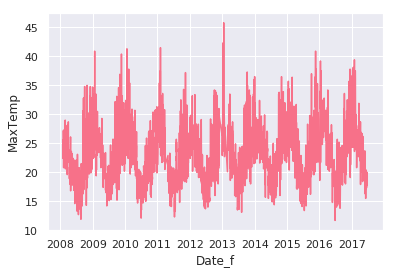

In [30]:
# Plot MaxTemp by date

sub_weather = weather.loc[weather['Location'] == 'Sydney',  ['Date_f', 'MinTemp', 'MaxTemp', 'Rainfall']]
display(sub_weather)
sns.set_palette("husl")
g = sns.lineplot(x="Date_f", y="MaxTemp", data=sub_weather)
g.set_ylabels("Maximum Daily Temperature (Celsius)")
g.set_xlabels("Date")
# Use more informative axis labels than are provided by default
#g = (g.set_axis_labels("Date","Maximum Daily Temperature (Celsius)"))
